# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [6]:
# Create our features
X = df.drop(columns='loan_status')
X = pd.get_dummies(X)
X.head()


# Create our target


y = df['loan_status']
y = y.to_frame()
y.head()

,loan_status
0,low_risk
1,low_risk
2,low_risk
3,low_risk
4,low_risk


In [7]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [8]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Create X_train, X_test, y_train, y_test
# YOUR CODE HERE



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# Testing 

X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
29175,8600.0,6.792,44500,0.325843,3,0,14500,0,1,0
23020,7800.0,6.419,41000,0.268293,2,0,11000,0,1,0
31269,10000.0,7.386,50100,0.401198,4,1,20100,0,1,0
35479,9300.0,7.093,47300,0.365751,3,0,17300,0,0,1
13470,9200.0,7.045,46900,0.360341,3,0,16900,0,1,0


## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [17]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
# YOUR CODE HERE

Sscaler = StandardScaler()

In [18]:
Sscaler

StandardScaler()

In [20]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE

X_scaler = Sscaler.fit(X_train)

In [21]:
X_scaler

StandardScaler()

In [23]:
# Scale the training and testing data
# YOUR CODE HERE

X_train_scale = X_scaler.transform(X_train)
X_test_scale = X_scaler.transform(X_test)

training = len(X_train_scale)

testing = len(X_test_scale)

# Simple Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [25]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

In [26]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  563,    56],
       [  102, 18663]], dtype=int64)

In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      0.91      0.99      0.88      0.95      0.90       619
   low_risk       1.00      0.99      0.91      1.00      0.95      0.91     18765

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [29]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE!
from imblearn.over_sampling import RandomOverSampler

random = RandomOverSampler(random_state=1)
X_resample, y_resample = random.fit_resample(X_train_scale, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resample)

Counter({'loan_status': 1})

In [36]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE


lr_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_model.fit(X_resample, y_resample)

LogisticRegression(random_state=1)

In [37]:
# Calculated the balanced accuracy score
# YOUR CODE HERE



lr_y_pred = lr_model.predict(X_test_scale)
lr_bac = round(balanced_accuracy_score(y_test, lr_y_pred), 5)

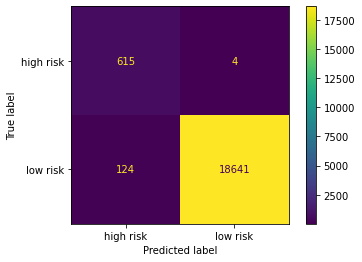

In [40]:
# Display the confusion matrix
# YOUR CODE HERE


from sklearn.metrics import ConfusionMatrixDisplay

lr_confusmat = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_confusmat, display_labels=['high risk', 'low risk'])
disp.plot();

In [41]:
# Print the imbalanced classification report
# YOUR CODE HERE
from imblearn.metrics import classification_report_imbalanced

lr_classReport = classification_report_imbalanced(y_test, lr_y_pred)
print(lr_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.83      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [45]:
# Resample the training data with SMOTE
# YOUR CODE HERE
from imblearn.over_sampling import SMOTE

X_smote_resample, y_smote_resample = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_scale, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_smote_resample)

Counter({'loan_status': 1})

In [46]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

lr_smote_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_smote_model.fit(X_smote_resample, y_smote_resample)

LogisticRegression(random_state=1)

In [47]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_smote_predict = lr_smote_model.predict(X_test_scale)
bac_smote = round(balanced_accuracy_score(y_test, y_smote_predict),5)

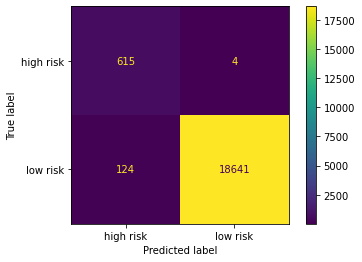

In [50]:
# Display the confusion matrix
# YOUR CODE HERE

confusmat_smote = confusion_matrix(y_test, y_smote_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=confusmat_smote, display_labels=['high risk', 'low risk'])

disp.plot();

In [51]:
# Print the imbalanced classification report
# YOUR CODE HERE

smote_classReport = classification_report_imbalanced(y_test, y_pred)
print(smote_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      0.91      0.99      0.88      0.95      0.90       619
   low_risk       1.00      0.99      0.91      1.00      0.95      0.91     18765

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
# Resample the data using the ClusterCentroids resampler
# YOUR CODE HERE

from imblearn.under_sampling import ClusterCentroids
from imblearn.metrics import classification_report_imbalanced

cc_resampler = ClusterCentroids(random_state=1)
X_cluster_resample, y_cluster_resample = cc_resampler.fit_resample(X_train_scale, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_cluster_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

lr_resample = LogisticRegression(solver='lbfgs', random_state=1)
lr_resample.fit(X_cluster_resample, y_cluster_resample)

In [ ]:
# Calculate the balanced accuracy score
# YOUR CODE HERE

y_cluster_predict = lr_resample.predict(X_test_scale)
bac_cluster = round(balanced_accuracy_score(y_test, y_cluster_predict),5)

In [ ]:
# Display the confusion matrix
# YOUR CODE HERE

cmx_cluster = confusion_matrix(y_test, y_cluster_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cmx_cluster, display_labels=['high risk', 'low risk'])
disp_plot();

In [ ]:
# Print the imbalanced classification report
# YOUR CODE HERE

imb_classified_report = classification_report_imbalanced(y_test, y_cluster_predict)
print(imb_classified_report)


# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [61]:
# Resample the training data with SMOTEENN
# YOUR CODE HERE

from imblearn.combine import SMOTEENN

smoteenn_resample = SMOTEENN(random_state=1)
X_smoteeen_resampled, y_smoteeen_resampled = smoteenn_resample.fit_resample(X_train_scale, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_smoteeen_resampled)

Counter({'loan_status': 1})

In [62]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

lr_smoteenn = LogisticRegression(solver='lbfgs', random_state=1)
lr_smoteenn.fit(X_smoteeen_resampled, y_smoteeen_resampled)

LogisticRegression(random_state=1)

In [63]:
# Calculate the balanced accuracy score
# YOUR CODE HERE

smoteenn_predict = lr_smoteenn.predict(X_test_scale)
bac_smoteeen = round(balanced_accuracy_score(y_test, smoteenn_predict),5)


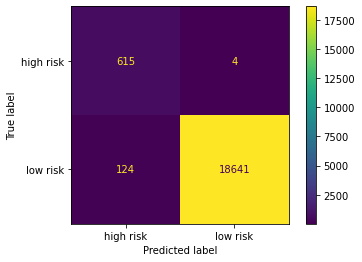

In [64]:
# Display the confusion matrix
# YOUR CODE HERE

confusmat_smoteenn = confusion_matrix(y_test, smoteenn_predict)
disp= ConfusionMatrixDisplay(confusion_matrix=confusmat_smoteenn, display_labels=['high risk', 'low risk'])
disp.plot();

In [65]:
# Print the imbalanced classification report
# YOUR CODE HERE

smoteenn_classReport = classification_report_imbalanced(y_test, smoteenn_predict)
print(smoteenn_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.83      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.


# Question 1 : There were a few with the best accuracy scores: (1) The Native Random Oversampling method, (2) The Smote Method, (3) The Smoteen Method.

# Question 2: The best recall score belonged to the Smoteen mode.

# Question 3: The best geometric score belonged to all the models. 